In [1]:
import gym
import random
import numpy as np
import time
from IPython.display import clear_output

import w_mac


init
[1 0 0 0 0]
[0 0 4 0 4]
[Box(5,), Box(5,)]
{1: [], 2: [], 3: [], 4: [], 5: []}
1 2
2 1
3 2
4 3
5 4


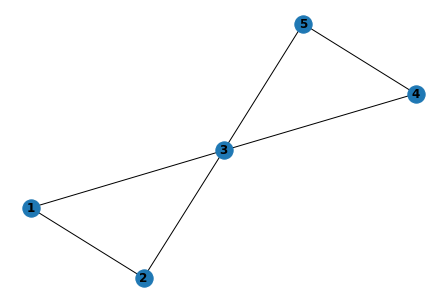

In [2]:
env = gym.make('wmac-v0')

In [3]:
action_space_size = np.prod(env.action_space.nvec)
state_space_size = np.prod(env.state_space.nvec)
print(action_space_size, state_space_size)

32 3125


In [6]:
#way to get count of combinations in Tuple space. Saving it for one with (Next_hop, queue)
#spaces = env.state_space.spaces
#np.prod(spaces[1].nvec)

In [5]:
#Create q-table

q_table = np.zeros((state_space_size,action_space_size))
#print(q_table.size)

100000


In [6]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

In [ ]:
rewards_all_episodes = []

#Q-Learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    
    done = False
    rewards_current_episodes = 0
    
    for step in range(max_steps_per_episode):
        
        #exploration exploiatation trade-off
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate:
            #print("state for action : ", state)
            action = np.argmax(q_table[state,:])
            #print("max action = ", action)
        else:
            action = random.randrange(0,8)#choose any node from 0 to 7
           # print("random action", action )
        new_state, reward, done, info = env.step(action)
        
        # Update Q-Table for Q(s,a)
        
        q_table[state,action] = q_table[state,action] * (1 - learning_rate) + \
learning_rate * (reward + discount_rate*np.max(q_table[new_state,:]))
        
        state = new_state
        rewards_current_episodes += reward

        if done == True:
            break
            
        #exploration rate decay
        exploration_rate = min_exploration_rate + \
            (max_exploration_rate - min_exploration_rate) * \
            np.exp(-exploration_decay_rate*episode)
        
        rewards_all_episodes.append(rewards_current_episodes)
    
#print(np.array(rewards_all_episodes))
#calculate and print the avg reqard per thousand episodes
#rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

#print("********Average reward per thousand episodes********\n")
#for r in rewards_per_thousand_episodes:
 #   print(count, ": ", str(sum(r/1000)))
 #   count += 1000
    
#Print updated Q table 
#print("\n\n-------Q-table-------\n")
#print(q_table)
